<a href="https://colab.research.google.com/github/alfredo802/Data_Science_Tools-and-Ecosystem/blob/main/Tarea%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##pregunta 1

In [1]:
import yfinance as yf

# Descargar datos históricos de Tesla
tesla_data = yf.Ticker("TSLA").history(period="max")

# Mostrar las primeras filas
print(tesla_data.head())

# Guardar los datos en un archivo CSV para análisis futuro
tesla_data.to_csv("Tesla_stock_data.csv")

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [17]:
##Pregunta 2

In [8]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd

# Configuración de Chrome en modo headless
chrome_options = Options()
chrome_options.add_argument("--headless")  # Ejecuta Chrome sin interfaz gráfica
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Configurar el controlador con opciones
driver = webdriver.Chrome(options=chrome_options)

# URL de la página
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url)

# Esperar que la página se cargue completamente
driver.implicitly_wait(10)

# Extraer el HTML
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

# Procesar tablas
tables = soup.find_all("table")
print(f"Número de tablas encontradas: {len(tables)}")

# Cerrar el navegador
driver.quit()


Número de tablas encontradas: 6


In [9]:
# Inspeccionar las tablas para identificar la que contiene los datos de ingresos
for i, table in enumerate(tables):
    print(f"Tabla {i}:")
    print(table.prettify()[:500])  # Imprime los primeros 500 caracteres de cada tabla
    print("\n")


Tabla 0:
<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Annual Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2023
   </td>
   <td style="text-align:center">
    $96,773
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022
   </td>
   <td style="text-align:center">
    $81,462
   </td>
  </tr>
  <tr>
 


Tabla 1:
<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Quarterly Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2024-09-30
   </td>
   <td style="text-align:center">
    $25,182
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2024-06-30
   </td>
   <td style="text-align:center">
 

In [10]:
import pandas as pd

# Seleccionar la Tabla 0 (Ingresos Anuales)
revenue_table = tables[0]
rows = revenue_table.find_all("tr")

# Procesar las filas para extraer datos
annual_revenue_data = []
for row in rows[1:]:  # Omitir el encabezado
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if cols:  # Asegurarse de que no esté vacío
        annual_revenue_data.append(cols)

# Crear un DataFrame para almacenar los datos anuales
annual_revenue_df = pd.DataFrame(annual_revenue_data, columns=["Año", "Ingresos (Millones USD)"])

# Mostrar los primeros registros
print(annual_revenue_df)

# Guardar en un archivo CSV
annual_revenue_df.to_csv("Tesla_Annual_Revenue.csv", index=False)


     Año Ingresos (Millones USD)
0   2023                 $96,773
1   2022                 $81,462
2   2021                 $53,823
3   2020                 $31,536
4   2019                 $24,578
5   2018                 $21,461
6   2017                 $11,759
7   2016                  $7,000
8   2015                  $4,046
9   2014                  $3,198
10  2013                  $2,013
11  2012                    $413
12  2011                    $204
13  2010                    $117
14  2009                    $112


In [11]:
# Seleccionar la Tabla 1 (Ingresos Trimestrales)
revenue_table = tables[1]
rows = revenue_table.find_all("tr")

# Procesar las filas para extraer datos
quarterly_revenue_data = []
for row in rows[1:]:  # Omitir el encabezado
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if cols:  # Asegurarse de que no esté vacío
        quarterly_revenue_data.append(cols)

# Crear un DataFrame para almacenar los datos trimestrales
quarterly_revenue_df = pd.DataFrame(quarterly_revenue_data, columns=["Fecha", "Ingresos (Millones USD)"])

# Mostrar los primeros registros
print(quarterly_revenue_df)

# Guardar en un archivo CSV
quarterly_revenue_df.to_csv("Tesla_Quarterly_Revenue.csv", index=False)


         Fecha Ingresos (Millones USD)
0   2024-09-30                 $25,182
1   2024-06-30                 $25,500
2   2024-03-31                 $21,301
3   2023-12-31                 $25,167
4   2023-09-30                 $23,350
..         ...                     ...
57  2010-06-30                     $28
58  2010-03-31                     $21
59  2009-12-31                        
60  2009-09-30                     $46
61  2009-06-30                     $27

[62 rows x 2 columns]


In [12]:
# Eliminar filas con ingresos vacíos
quarterly_revenue_df = quarterly_revenue_df[quarterly_revenue_df["Ingresos (Millones USD)"] != ""]


In [13]:
# Quitar el símbolo $ y las comas, luego convertir a tipo numérico
quarterly_revenue_df["Ingresos (Millones USD)"] = (
    quarterly_revenue_df["Ingresos (Millones USD)"]
    .replace({"[$,]": ""}, regex=True)
    .astype(float)
)


In [14]:
print(quarterly_revenue_df.head())


        Fecha  Ingresos (Millones USD)
0  2024-09-30                  25182.0
1  2024-06-30                  25500.0
2  2024-03-31                  21301.0
3  2023-12-31                  25167.0
4  2023-09-30                  23350.0


In [15]:
quarterly_revenue_df.to_csv("Tesla_Quarterly_Revenue_Cleaned.csv", index=False)


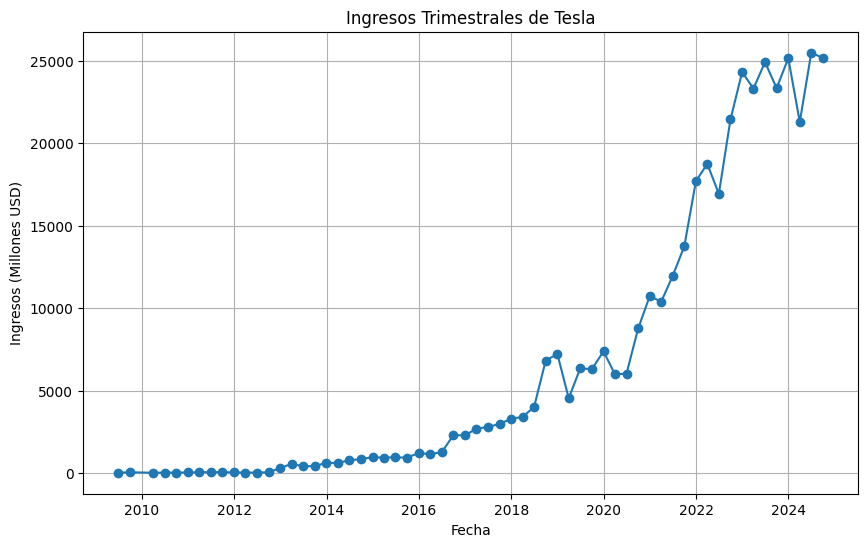

In [16]:
import matplotlib.pyplot as plt

# Convertir la columna "Fecha" a tipo datetime
quarterly_revenue_df["Fecha"] = pd.to_datetime(quarterly_revenue_df["Fecha"])

# Graficar los ingresos trimestrales
plt.figure(figsize=(10, 6))
plt.plot(quarterly_revenue_df["Fecha"], quarterly_revenue_df["Ingresos (Millones USD)"], marker="o")
plt.title("Ingresos Trimestrales de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Ingresos (Millones USD)")
plt.grid()
plt.show()


In [ ]:
## Pregunta 3

In [18]:
import yfinance as yf

# Descargar datos históricos de GameStop
gamestop_data = yf.Ticker("GME").history(period="max")

# Mostrar las primeras filas
print(gamestop_data.head())

# Guardar los datos en un archivo CSV para referencia futura
gamestop_data.to_csv("GameStop_Historical_Data.csv")

# Mostrar resumen del DataFrame
print(gamestop_data.info())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5730 entries, 2002-02-

In [ ]:
## Pregunta 4

In [20]:
pip install selenium


In [24]:
pip install pandas beautifulsoup4


In [26]:
!pip install playwright
!playwright install


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 23.0 MB/s eta 0:00:00
164.5 MiB [] 0% 0.0s164.5 MiB [] 0% 36.0s164.5 MiB [] 0% 24.6s164.5 MiB [] 0% 12.4s164.5 MiB [] 0% 11.0s164.5 MiB [] 0% 8.6s164.5 MiB [] 1% 6.6s164.5 MiB [] 2% 5.5s164.5 MiB [] 2% 4.9s164.5 MiB [] 3% 4.6s164.5 MiB [] 3% 4.4s164.5 MiB [] 3% 4.7s164.5 MiB [] 4% 4.6s164.5 MiB [] 4% 4.3s164.5 MiB [] 5% 4.0s164.5 MiB [] 6% 3.9s164.5 MiB [] 6% 3.7s164.5 MiB [] 7% 3.6s164.5 MiB [] 8% 3.4s164.5 MiB [] 9% 3.2s164.5 MiB [] 9% 3.1s164.5 MiB [] 10% 3.1s164.5 MiB [] 11% 2.9s164.5 MiB [] 12% 2.8s164.5 MiB [] 13% 2.7s164.5 MiB [] 14% 2.6s164.5 MiB [] 15% 2.6s164.5 MiB [] 15% 2.5s164.5 MiB [] 16% 2.5s164.5 MiB [] 17% 2.4s164.5 MiB [] 18% 2.3s164.5 MiB [] 19% 2.3s164.5 MiB [] 20% 2.2s164.5 MiB [] 21% 2.2s164.5 MiB [] 22% 2.1s164.5 MiB [] 23% 2.0s164.5 MiB [] 24% 2.0s164.5 MiB [] 24% 1.9s164.5 MiB [] 25% 1.9s164.5 MiB [] 26% 1.9s164.5 MiB [] 27% 1.9s164.5 MiB [] 28% 1.8s164.5 MiB [] 29% 1.7s164.5 MiB [] 30% 1.7s164.5 MiB [] 3

In [33]:
import nest_asyncio
import asyncio
from playwright.async_api import async_playwright
import pandas as pd
from bs4 import BeautifulSoup

# Permitir la reutilización del bucle de eventos en entornos como Jupyter/Colab
nest_asyncio.apply()

async def scrape_gamestop_revenue():
    async with async_playwright() as p:
        # Lanzar el navegador en modo headless
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()

        # URL de los datos de ingresos de GameStop
        url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

        # Intentar cargar la página con reintentos
        retries = 0
        MAX_RETRIES = 3
        while retries < MAX_RETRIES:
            try:
                # Configurar encabezados para evitar bloqueos
                await page.set_extra_http_headers({
                    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
                })

                # Navegar a la página
                await page.goto(url, timeout=60000, wait_until="domcontentloaded")
                print("Página cargada con éxito")
                break
            except Exception as e:
                retries += 1
                print(f"Reintento {retries}/{MAX_RETRIES} debido a: {e}")
                await asyncio.sleep(5)
        if retries == MAX_RETRIES:
            print("No se pudo cargar la página tras varios intentos")
            return

        # Extraer el contenido HTML
        html = await page.content()
        await browser.close()

    # Analizar el contenido HTML con BeautifulSoup
    soup = BeautifulSoup(html, "html.parser")

    # Buscar todas las tablas en la página
    tables = soup.find_all("table")
    if not tables:
        print("No se encontraron tablas en la página.")
        return

    # Seleccionar la primera tabla (Tabla de ingresos anuales)
    revenue_table = tables[0]
    rows = revenue_table.find_all("tr")

    # Procesar filas y columnas de la tabla
    revenue_data = []
    for row in rows[1:]:  # Omitir encabezados
        cols = row.find_all("td")
        cols = [col.text.strip() for col in cols]
        if cols:
            revenue_data.append(cols)

    # Crear un DataFrame con los datos
    columns = ["Año", "Ingresos (Millones USD)"]
    revenue_df = pd.DataFrame(revenue_data, columns=columns)

    # Limpieza de datos: eliminar símbolos y convertir a números
    revenue_df["Ingresos (Millones USD)"] = (
        revenue_df["Ingresos (Millones USD)"]
        .replace({"[$,]": ""}, regex=True)
        .astype(float)
    )

    # Guardar el DataFrame en un archivo CSV
    revenue_df.to_csv("GameStop_Revenue_Data.csv", index=False)
    print("Datos guardados en 'GameStop_Revenue_Data.csv'")

    # Mostrar el DataFrame
    print(revenue_df)

# Ejecutar la función asincrónica
await scrape_gamestop_revenue()


Página cargada con éxito
Datos guardados en 'GameStop_Revenue_Data.csv'
     Año  Ingresos (Millones USD)
0   2024                   5273.0
1   2023                   5927.0
2   2022                   6011.0
3   2021                   5090.0
4   2020                   6466.0
5   2019                   8285.0
6   2018                   8547.0
7   2017                   7965.0
8   2016                   9364.0
9   2015                   9296.0
10  2014                   9040.0
11  2013                   8887.0
12  2012                   9551.0
13  2011                   9474.0
14  2010                   9078.0
15  2009                   8806.0


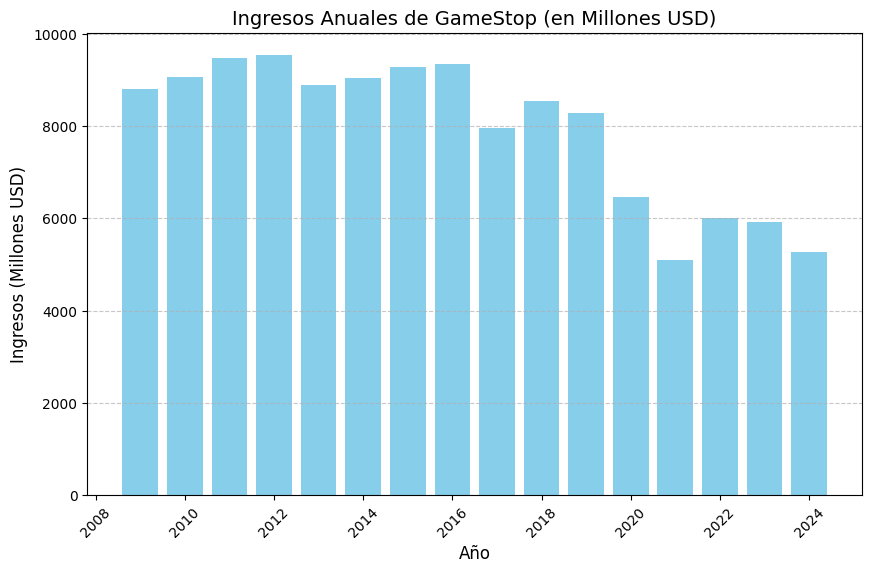

In [34]:
import matplotlib.pyplot as plt

# Cargar los datos desde el CSV
data = pd.read_csv("GameStop_Revenue_Data.csv")

# Crear un gráfico de ingresos por año
plt.figure(figsize=(10, 6))
plt.bar(data["Año"], data["Ingresos (Millones USD)"], color="skyblue")
plt.title("Ingresos Anuales de GameStop (en Millones USD)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Ingresos (Millones USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
## Pregunta 5

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [74]:
# Descargar datos históricos de las acciones de Tesla
tesla_data = yf.download('TSLA', start='2020-01-01', end='2024-11-17')


[*********************100%***********************]  1 of 1 completed


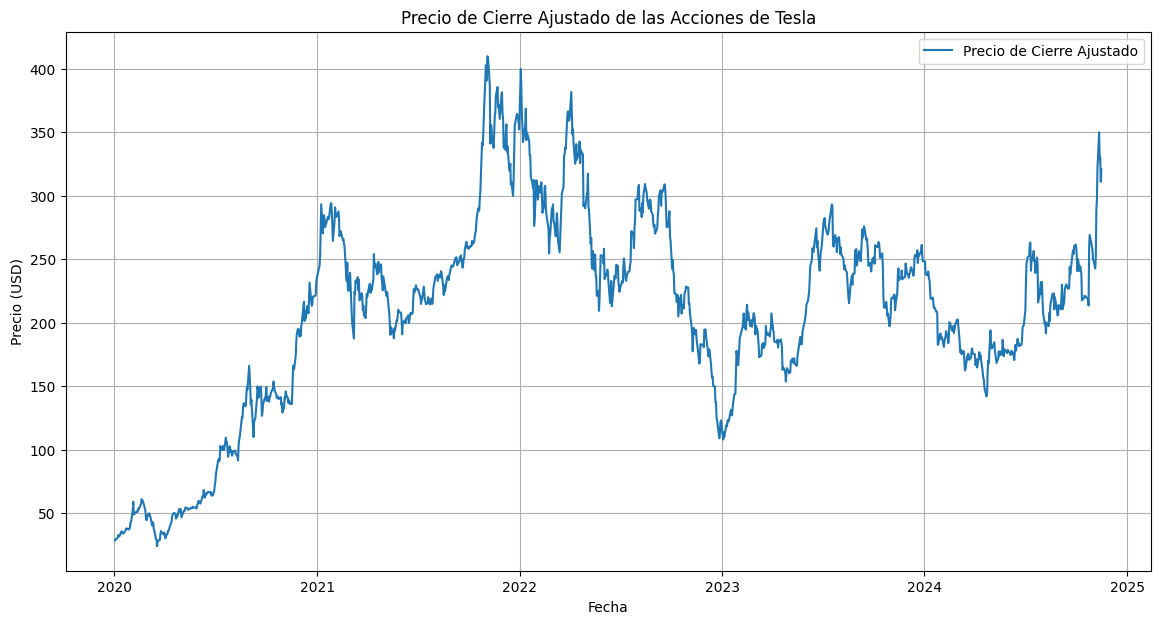

In [75]:
# Graficar el precio de cierre ajustado
plt.figure(figsize=(14, 7))
plt.plot(tesla_data.index, tesla_data['Adj Close'], label='Precio de Cierre Ajustado')
plt.title('Precio de Cierre Ajustado de las Acciones de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [76]:
# Obtener datos financieros de Tesla
tesla = yf.Ticker('TSLA')
financials = tesla.financials.T  # Transponer para facilitar la lectura


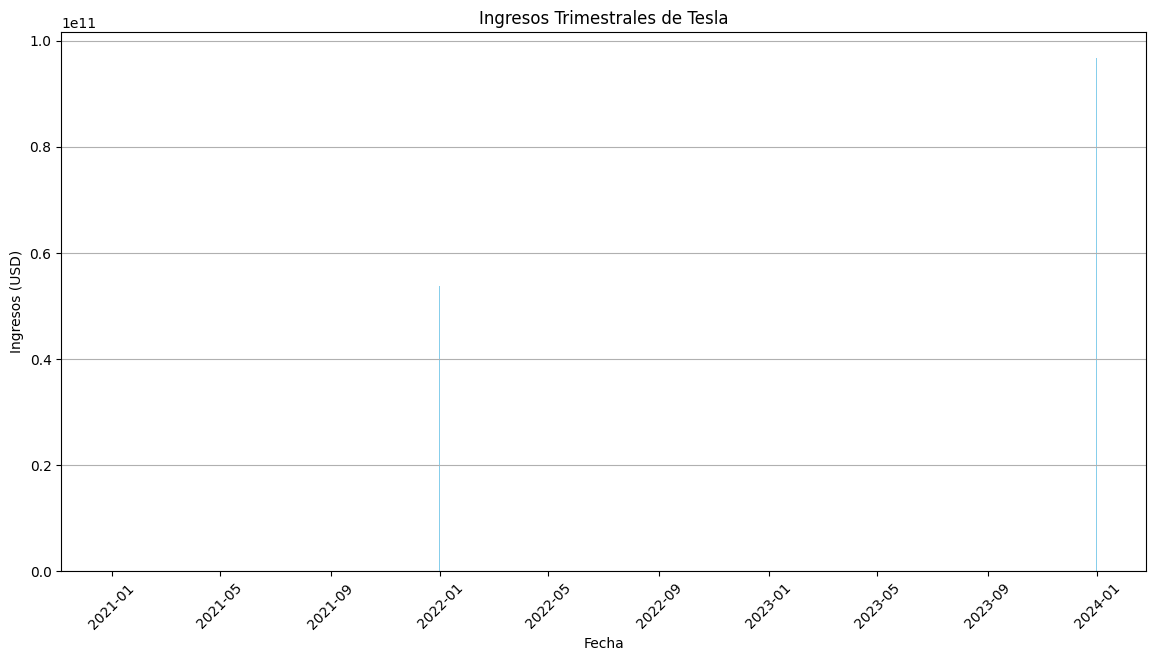

In [77]:
# Extraer los ingresos trimestrales
ingresos_trimestrales = financials['Total Revenue']

# Graficar los ingresos trimestrales
plt.figure(figsize=(14, 7))
plt.bar(ingresos_trimestrales.index, ingresos_trimestrales.values, color='skyblue')
plt.title('Ingresos Trimestrales de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [78]:
import plotly.graph_objects as go

# Crear una figura
fig = go.Figure()

# Añadir traza para el precio de las acciones
fig.add_trace(go.Scatter(x=tesla_data.index, y=tesla_data['Adj Close'],
                         mode='lines', name='Precio de Cierre Ajustado'))

# Añadir traza para los ingresos trimestrales
fig.add_trace(go.Bar(x=ingresos_trimestrales.index, y=ingresos_trimestrales.values,
                     name='Ingresos Trimestrales', yaxis='y2', opacity=0.6))

# Configurar ejes
fig.update_layout(
    title='Precio de las Acciones e Ingresos Trimestrales de Tesla',
    xaxis=dict(title='Fecha'),
    yaxis=dict(title='Precio de Cierre Ajustado (USD)'),
    yaxis2=dict(title='Ingresos Trimestrales (USD)', overlaying='y', side='right'),
    legend=dict(x=0.01, y=0.99),
    hovermode='x'
)

fig.show()


In [ ]:
#Pregunta 6

In [79]:
!pip install yfinance matplotlib pandas


In [80]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


In [81]:
# Descargar datos históricos de las acciones de GameStop
gme_data = yf.download('GME', start='2020-01-01', end='2024-11-17')


[*********************100%***********************]  1 of 1 completed


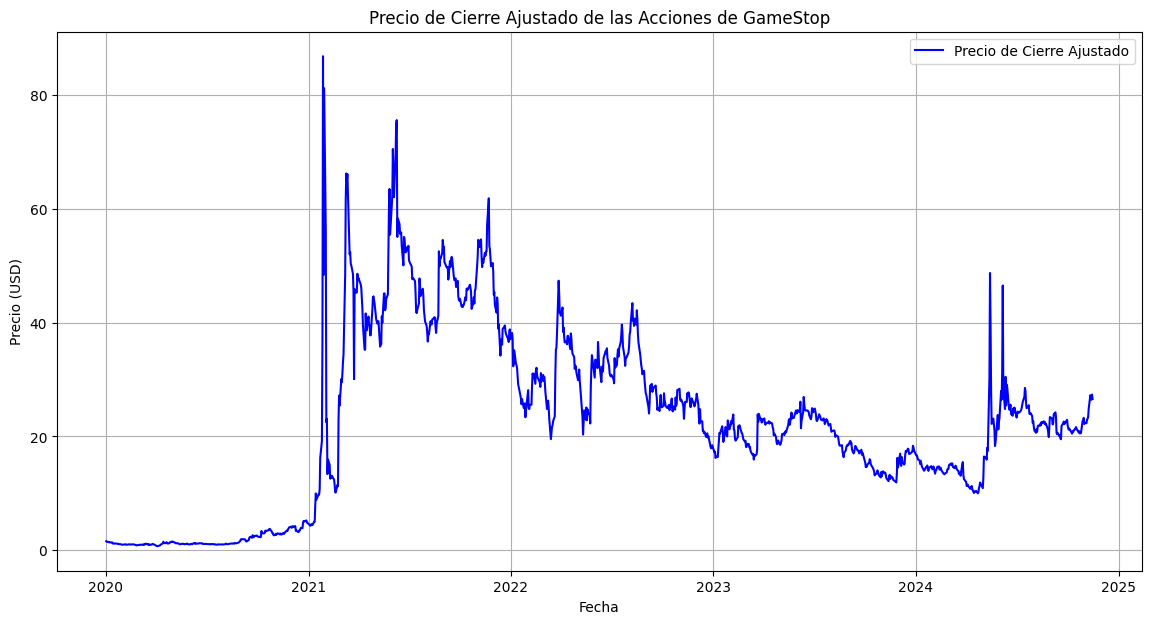

In [82]:
# Graficar el precio de cierre ajustado
plt.figure(figsize=(14, 7))
plt.plot(gme_data.index, gme_data['Adj Close'], label='Precio de Cierre Ajustado', color='blue')
plt.title('Precio de Cierre Ajustado de las Acciones de GameStop')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
# Datos de ingresos trimestrales de GameStop (en millones de USD)
data = {
    'Fecha': ['2023-10-28', '2023-07-29', '2023-04-29', '2023-01-28', '2022-10-29', '2022-07-30', '2022-04-30', '2022-01-29'],
    'Ingresos': [1078.3, 1163.8, 1483.0, 2254.7, 1297.2, 1377.8, 2035.0, 3170.5]
}
ingresos_df = pd.DataFrame(data)
ingresos_df['Fecha'] = pd.to_datetime(ingresos_df['Fecha'])
ingresos_df.set_index('Fecha', inplace=True)


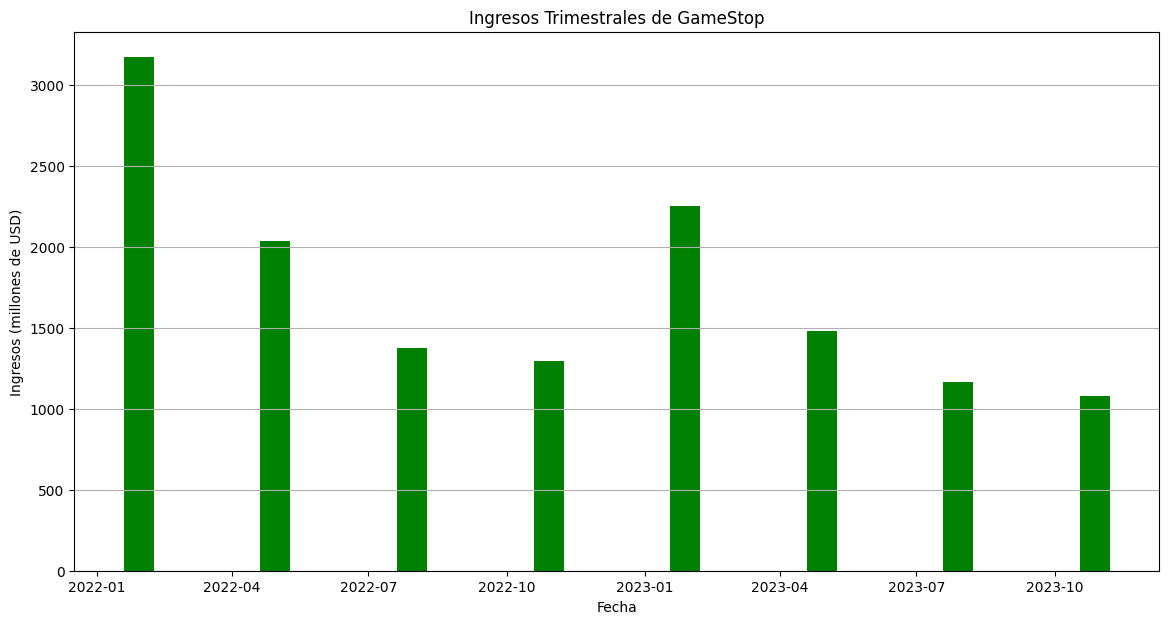

In [84]:
# Graficar los ingresos trimestrales
plt.figure(figsize=(14, 7))
plt.bar(ingresos_df.index, ingresos_df['Ingresos'], color='green', width=20)
plt.title('Ingresos Trimestrales de GameStop')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (millones de USD)')
plt.grid(axis='y')
plt.show()


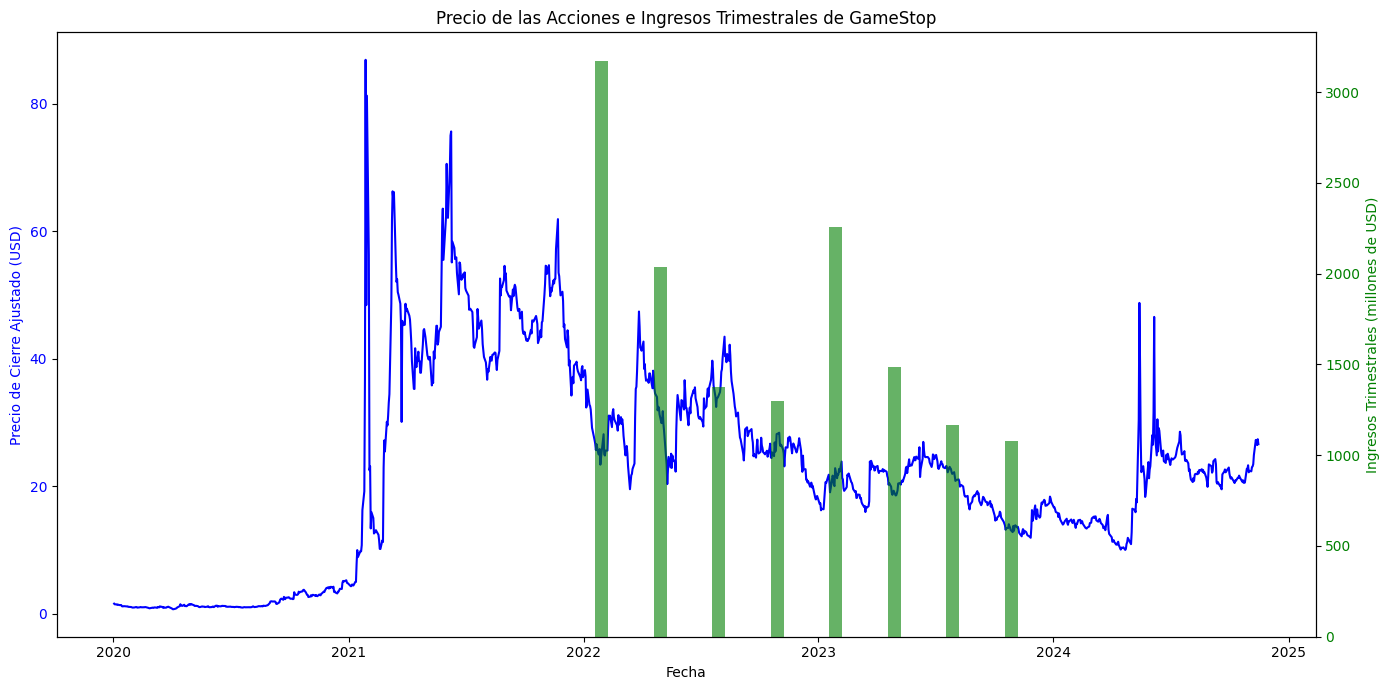

In [85]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico del precio de las acciones
ax1.plot(gme_data.index, gme_data['Adj Close'], color='blue', label='Precio de Cierre Ajustado')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio de Cierre Ajustado (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para los ingresos
ax2 = ax1.twinx()
ax2.bar(ingresos_df.index, ingresos_df['Ingresos'], color='green', alpha=0.6, width=20, label='Ingresos Trimestrales')
ax2.set_ylabel('Ingresos Trimestrales (millones de USD)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título y leyendas
plt.title('Precio de las Acciones e Ingresos Trimestrales de GameStop')
fig.tight_layout()
plt.show()
